### Data Import and Cleaning

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from joblib import load
from joblib import dump


warnings.filterwarnings('ignore')

In [2]:
#pip install scikit-learn==1.2.2

In [3]:
print(sklearn.__version__)

1.2.2


In [6]:
# This list is based on common geographical knowledge and may need adjustments for specific cases.
def map_country_to_continent(country):
    continent_map = {
        'Afghanistan': 'Asia',
        'Albania': 'Europe',
        'Algeria': 'Africa',
        'Andorra': 'Europe',
        'Angola': 'Africa',
        'Antigua and Barbuda': 'North America',
        'Argentina': 'South America',
        'Armenia': 'Asia',
        'Australia': 'Oceania',
        'Austria': 'Europe',
        'Azerbaijan': 'Asia',
        'Bahamas': 'North America',
        'Bahrain': 'Asia',
        'Bangladesh': 'Asia',
        'Barbados': 'North America',
        'Belarus': 'Europe',
        'Belgium': 'Europe',
        'Belize': 'North America',
        'Benin': 'Africa',
        'Bhutan': 'Asia',
        'Bolivia': 'South America',
        'Bosnia and Herzegovina': 'Europe',
        'Botswana': 'Africa',
        'Brazil': 'South America',
        'Brunei': 'Asia',
        'Bulgaria': 'Europe',
        'Burkina Faso': 'Africa',
        'Burundi': 'Africa',
        'Cabo Verde': 'Africa',
        'Cambodia': 'Asia',
        'Cameroon': 'Africa',
        'Canada': 'North America',
        'Central African Republic': 'Africa',
        'Chad': 'Africa',
        'Chile': 'South America',
        'China': 'Asia',
        'Colombia': 'South America',
        'Comoros': 'Africa',
        'Congo (Congo-Brazzaville)': 'Africa',
        'Costa Rica': 'North America',
        'Croatia': 'Europe',
        'Cuba': 'North America',
        'Cyprus': 'Asia',
        'Czech Republic (Czechia)': 'Europe',
        'Democratic Republic of the Congo': 'Africa',
        'Denmark': 'Europe',
        'Djibouti': 'Africa',
        'Dominica': 'North America',
        'Dominican Republic': 'North America',
        'Ecuador': 'South America',
        'Egypt': 'Africa',
        'El Salvador': 'North America',
        'Equatorial Guinea': 'Africa',
        'Eritrea': 'Africa',
        'Estonia': 'Europe',
        'Eswatini (Swaziland)': 'Africa',
        'Ethiopia': 'Africa',
        'Fiji': 'Oceania',
        'Finland': 'Europe',
        'France': 'Europe',
        'Gabon': 'Africa',
        'Gambia': 'Africa',
        'Georgia': 'Asia',
        'Germany': 'Europe',
        'Ghana': 'Africa',
        'Greece': 'Europe',
        'Grenada': 'North America',
        'Guatemala': 'North America',
        'Guinea': 'Africa',
        'Guinea-Bissau': 'Africa',
        'Guyana': 'South America',
        'Haiti': 'North America',
        'Honduras': 'North America',
        'Hungary': 'Europe',
        'Iceland': 'Europe',
        'India': 'Asia',
        'Indonesia': 'Asia',
        'Iran': 'Asia',
        'Iraq': 'Asia',
        'Ireland': 'Europe',
        'Israel': 'Asia',
        'Italy': 'Europe',
        'Jamaica': 'North America',
        'Japan': 'Asia',
        'Jordan': 'Asia',
        'Kazakhstan': 'Asia',
        'Kenya': 'Africa',
        'Kiribati': 'Oceania',
        'Kuwait': 'Asia',
        'Kyrgyzstan': 'Asia',
        'Laos': 'Asia',
        'Latvia': 'Europe',
        'Lebanon': 'Asia',
        'Lesotho': 'Africa',
        'Liberia': 'Africa',
        'Libya': 'Africa',
        'Liechtenstein': 'Europe',
        'Lithuania': 'Europe',
        'Luxembourg': 'Europe',
        'Madagascar': 'Africa',
        'Malawi': 'Africa',
        'Malaysia': 'Asia',
        'Maldives': 'Asia',
        'Mali': 'Africa',
        'Malta': 'Europe',
        'Marshall Islands': 'Oceania',
        'Mauritania': 'Africa',
        'Mauritius': 'Africa',
        'Mexico': 'North America',
        'Micronesia': 'Oceania',
        'Moldova': 'Europe',
        'Monaco': 'Europe',
        'Mongolia': 'Asia',
        'Montenegro': 'Europe',
        'Morocco': 'Africa',
        'Mozambique': 'Africa',
        'Myanmar (Burma)': 'Asia',
        'Namibia': 'Africa',
        'Nauru': 'Oceania',
        'Nepal': 'Asia',
        'Netherlands': 'Europe',
        'New Zealand': 'Oceania',
        'Nicaragua': 'North America',
        'Niger': 'Africa',
        'Nigeria': 'Africa',
        'North Korea': 'Asia',
        'North Macedonia': 'Europe',
        'Norway': 'Europe',
        'Oman': 'Asia',
        'Pakistan': 'Asia',
        'Palau': 'Oceania',
        'Palestine State': 'Asia',
        'Panama': 'North America',
        'Papua New Guinea': 'Oceania',
        'Paraguay': 'South America',
        'Peru': 'South America',
        'Philippines': 'Asia',
        'Poland': 'Europe',
        'Portugal': 'Europe',
        'Qatar': 'Asia',
        'Romania': 'Europe',
        'Russia': 'Europe/Asia',
        'Rwanda': 'Africa',
        'Saint Kitts and Nevis': 'North America',
        'Saint Lucia': 'North America',
        'Saint Vincent and the Grenadines': 'North America',
        'Samoa': 'Oceania',
        'San Marino': 'Europe',
        'Sao Tome and Principe': 'Africa',
        'Saudi Arabia': 'Asia',
        'Senegal': 'Africa',
        'Serbia': 'Europe',
        'Seychelles': 'Africa',
        'Sierra Leone': 'Africa',
        'Singapore': 'Asia',
        'Slovakia': 'Europe',
        'Slovenia': 'Europe',
        'Solomon Islands': 'Oceania',
        'Somalia': 'Africa',
        'South Africa': 'Africa',
        'South Korea': 'Asia',
        'South Sudan': 'Africa',
        'Spain': 'Europe',
        'Sri Lanka': 'Asia',
        'Sudan': 'Africa',
        'Suriname': 'South America',
        'Sweden': 'Europe',
        'Switzerland': 'Europe',
        'Syria': 'Asia',
        'Taiwan': 'Asia',
        'Tajikistan': 'Asia',
        'Tanzania': 'Africa',
        'Thailand': 'Asia',
        'Timor-Leste': 'Asia',
        'Togo': 'Africa',
        'Tonga': 'Oceania',
        'Trinidad and Tobago': 'North America',
        'Tunisia': 'Africa',
        'Turkey': 'Asia/Europe',
        'Turkmenistan': 'Asia',
        'Tuvalu': 'Oceania',
        'Uganda': 'Africa',
        'Ukraine': 'Europe',
        'United Arab Emirates': 'Asia',
        'United Kingdom': 'Europe',
        'United States of America': 'North America',
        'Uruguay': 'South America',
        'Uzbekistan': 'Asia',
        'Vanuatu': 'Oceania',
        'Vatican City': 'Europe',
        'Venezuela': 'South America',
        'Vietnam': 'Asia',
        'Yemen': 'Asia',
        'Zambia': 'Africa',
        'Zimbabwe': 'Africa'
    }

    return continent_map.get(country, 'Islands/Unknown/Other')

In [7]:
# # Load the CSV files
# files = ['survey_results_public_2020.csv', 
#          'survey_results_public_2021.csv', 
#          'survey_results_public_2022.csv', 
#          'survey_results_public_2023.csv']

# dfs = [pd.read_csv(f) for f in files]



# # Merge the DataFrames
# merged_df = pd.concat(dfs, ignore_index=True)

In [8]:
import pandas as pd

# Load the CSV files
files = ['survey_results_public_2020.csv', 
         'survey_results_public_2021.csv', 
         'survey_results_public_2022.csv', 
         'survey_results_public_2023.csv']

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each file, load the DataFrame, and rename columns as necessary
for f in files:
    df = pd.read_csv(f)
    # Check if the 'ConvertedCompYearly' column exists and rename it if it does
    if 'ConvertedCompYearly' in df.columns:
        df.rename(columns={'ConvertedCompYearly': 'ConvertedComp'}, inplace=True)
    dfs.append(df)

# Merge the DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

In [9]:
# After merging the DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Check if 'ConvertedCompYearly' is in the merged DataFrame's columns
if 'ConvertedCompYearly' not in merged_df.columns:
    print("The 'ConvertedCompYearly' column has been successfully renamed to 'ConvertedComp', or it did not exist.")
else:
    print("The 'ConvertedCompYearly' column still exists in the merged DataFrame.")


The 'ConvertedCompYearly' column has been successfully renamed to 'ConvertedComp', or it did not exist.


In [10]:
# Select the columns
merged_df = merged_df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
merged_df = merged_df.rename(columns={"ConvertedComp": "Salary", 
                                      "YearsCodePro": "Years of Experience", 
                                      "EdLevel": "Education Level"})
merged_df['Continent'] = merged_df['Country'].apply(map_country_to_continent)
merged_df.head()

,Country,Education Level,Years of Experience,Employment,Salary,Continent
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,Europe
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,Europe
2,Russian Federation,NaN,NaN,NaN,NaN,Islands/Unknown/Other
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,Europe
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,Islands/Unknown/Other


In [11]:
merged_df.shape

(310352, 6)

In [12]:
# Remove null values
cleaned_df = merged_df.dropna()
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.head()

,Country,Education Level,Years of Experience,Employment,Salary,Continent
0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,Islands/Unknown/Other
1,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,Europe
2,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,Europe
3,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,Europe
4,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,Europe


In [13]:
cleaned_df.to_csv('cleaned.csv', index=False)

In [14]:
unique_values = cleaned_df['Education Level'].unique()
unique_values

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education', 'Something else',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'], dtype=object)

##### Cleaning Employment column

In [15]:
def clean_employment(x):
    if 'Retired' in x:
        return 'Retired'
    elif 'Independent contractor, freelancer, or self-employed' in x:
        return 'Self-employed/Freelancer'
    elif 'Employed, full-time' in x or 'Employed full-time' in x:
        return 'Full-time Employment'
    elif 'Employed, part-time' in x or 'Employed part-time' in x:
        return 'Part-time Employment'
    elif 'I prefer not to say' in x:
        return 'Prefer not to say'
    else:
        return 'Other'

# Assuming cleaned_df is your DataFrame and 'Employment' is the column you want to clean
cleaned_df['Employment'] = cleaned_df['Employment'].apply(clean_employment)

In [16]:
cleaned_df['Employment'].unique()

array(['Full-time Employment', 'Self-employed/Freelancer',
       'Part-time Employment', 'Prefer not to say', 'Retired'],
      dtype=object)

##### Cleaning Education

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

cleaned_df['Education Level'] = cleaned_df['Education Level'].apply(clean_education)

##### Cleaning Years of experience

In [18]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

cleaned_df['Years of Experience'] = cleaned_df['Years of Experience'].apply(clean_experience)

### Data Segmentation by Continent

In [23]:
# Filter data for Europe and South America
europe_df = cleaned_df[cleaned_df['Continent'] == 'Europe']
south_america_df = cleaned_df[cleaned_df['Continent'] == 'South America']
europe_df = europe_df.reset_index(drop=True)
south_america_df = south_america_df.reset_index(drop=True)
north_america_df = cleaned_df[cleaned_df['Continent'] == 'North America']
north_america_df = north_america_df.reset_index(drop=True)

In [24]:
europe_df.head()

,Country,Education Level,Years of Experience,Employment,Salary,Continent
0,United Kingdom,Master’s degree,4.0,Full-time Employment,32315.0,Europe
1,United Kingdom,Bachelor’s degree,2.0,Full-time Employment,40070.0,Europe
2,Spain,Less than a Bachelors,7.0,Full-time Employment,14268.0,Europe
3,Netherlands,Less than a Bachelors,20.0,Full-time Employment,38916.0,Europe
4,United Kingdom,Bachelor’s degree,23.0,Self-employed/Freelancer,108576.0,Europe


In [25]:
europe_df.shape

(61689, 6)

In [26]:
europe_df.describe()

,Years of Experience,Salary
count,61689.000000,6.168900e+04
mean,9.516170,8.772334e+04
std,7.600859,3.101996e+05
min,0.500000,0.000000e+00
25%,4.000000,3.882000e+04
50%,7.000000,5.768400e+04
75%,13.000000,8.209500e+04
max,50.000000,4.524131e+07


##### Number of people from each country that answered the StackOverflow Developer Salary Survey in Europe

In [27]:
europe_df.Country.value_counts()

Country
Germany                   12275
France                     5887
Poland                     4133
Netherlands                4106
Spain                      3905
Italy                      3393
Sweden                     3112
United Kingdom             2551
Switzerland                2082
Austria                    1687
Norway                     1501
Denmark                    1500
Belgium                    1467
Ukraine                    1427
Portugal                   1368
Romania                    1359
Finland                    1327
Greece                     1132
Hungary                    1029
Ireland                    1015
Bulgaria                    840
Serbia                      662
Slovenia                    602
Lithuania                   561
Slovakia                    531
Croatia                     528
Estonia                     425
Belarus                     281
Latvia                      279
Bosnia and Herzegovina      202
Luxembourg                  127


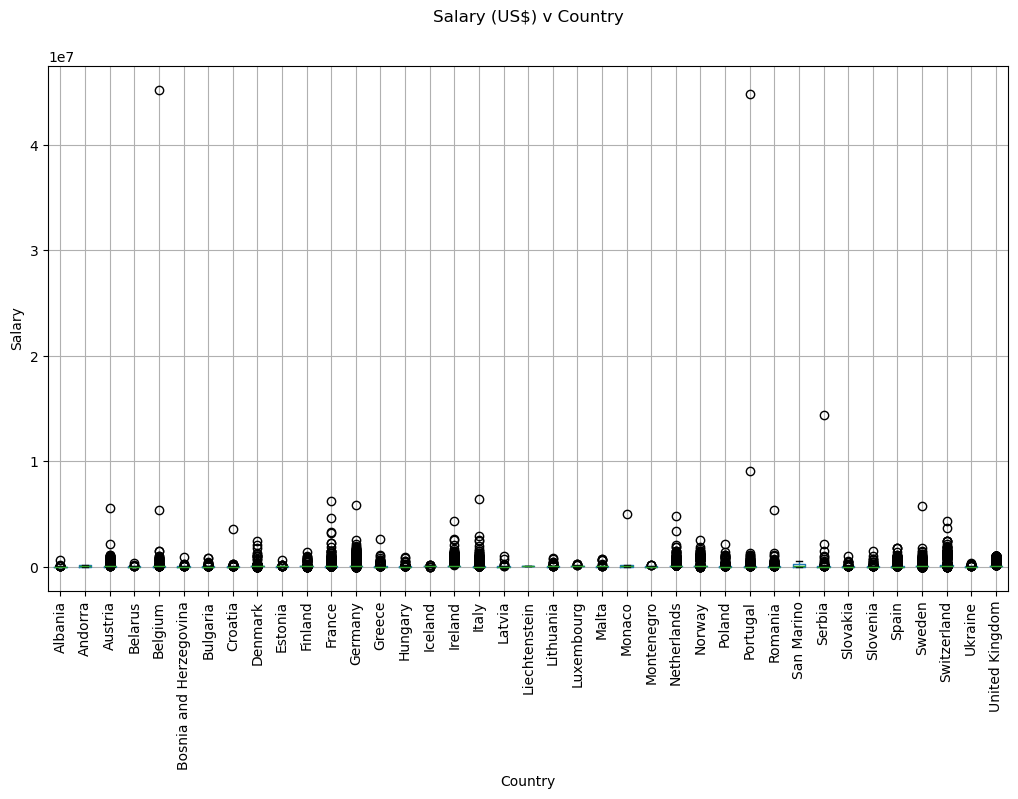

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
europe_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [29]:
europe_df = europe_df[europe_df["Salary"] <= 250000]
europe_df = europe_df[europe_df["Salary"] >= 10000]
europe_df = europe_df[europe_df['Country'] != 'Other']

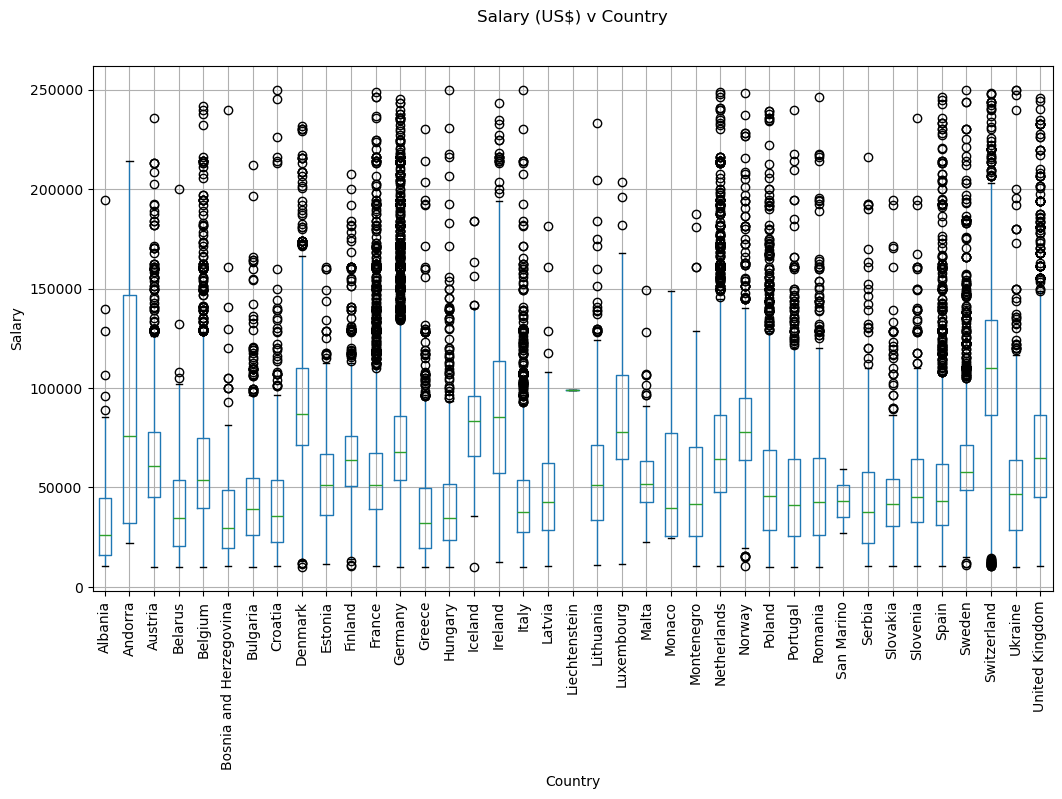

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
europe_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [31]:
europe_df.to_csv('europe.csv', index=False)

In [32]:
south_america_df.head()

,Country,Education Level,Years of Experience,Employment,Salary,Continent
0,Brazil,Master’s degree,6.0,Full-time Employment,55893.0,South America
1,Brazil,Bachelor’s degree,15.0,Full-time Employment,16488.0,South America
2,Brazil,Less than a Bachelors,3.0,Full-time Employment,8244.0,South America
3,Brazil,Less than a Bachelors,10.0,Full-time Employment,8712.0,South America
4,Brazil,Bachelor’s degree,9.0,Full-time Employment,17184.0,South America


In [33]:
south_america_df.shape

(8867, 6)

In [34]:
south_america_df.Country.value_counts()

Country
Brazil       5239
Argentina    1194
Colombia      920
Chile         514
Uruguay       312
Peru          288
Ecuador       186
Paraguay      104
Bolivia        95
Guyana         10
Suriname        5
Name: count, dtype: int64

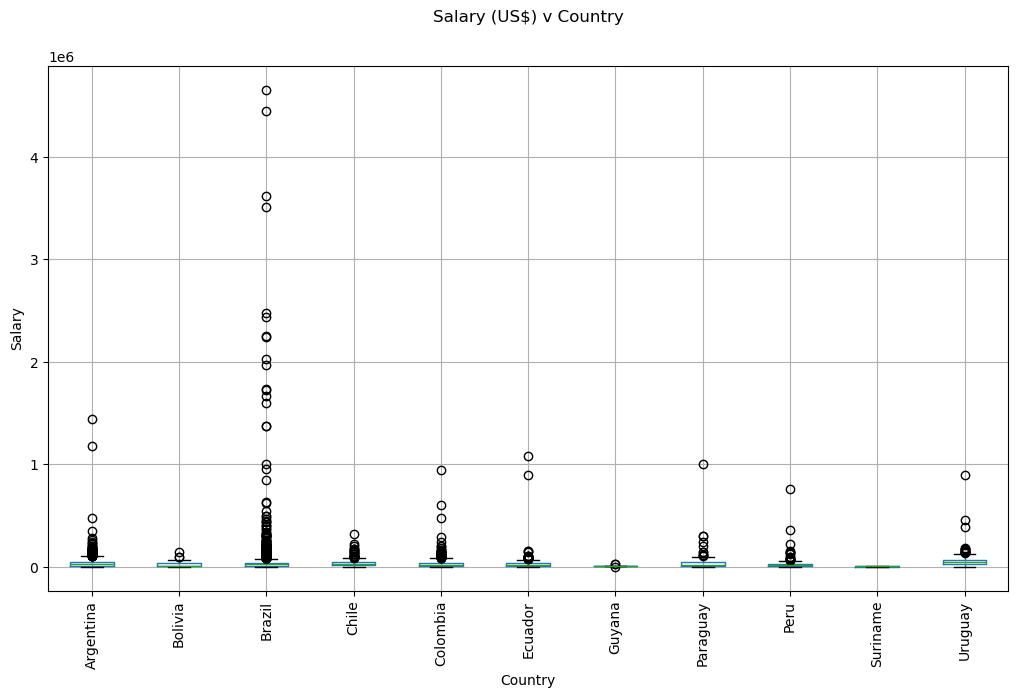

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
south_america_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [36]:
south_america_df.describe()

,Years of Experience,Salary
count,8867.000000,8.867000e+03
mean,8.673565,4.068658e+04
std,7.284376,1.228727e+05
min,0.500000,0.000000e+00
25%,3.000000,1.319050e+04
50%,6.000000,2.474400e+04
75%,12.000000,4.281600e+04
max,50.000000,4.656132e+06


In [37]:
south_america_df = south_america_df[south_america_df["Salary"] <= 250000]
south_america_df = south_america_df[south_america_df["Salary"] >= 10000]
south_america_df = south_america_df[south_america_df['Country'] != 'Other']

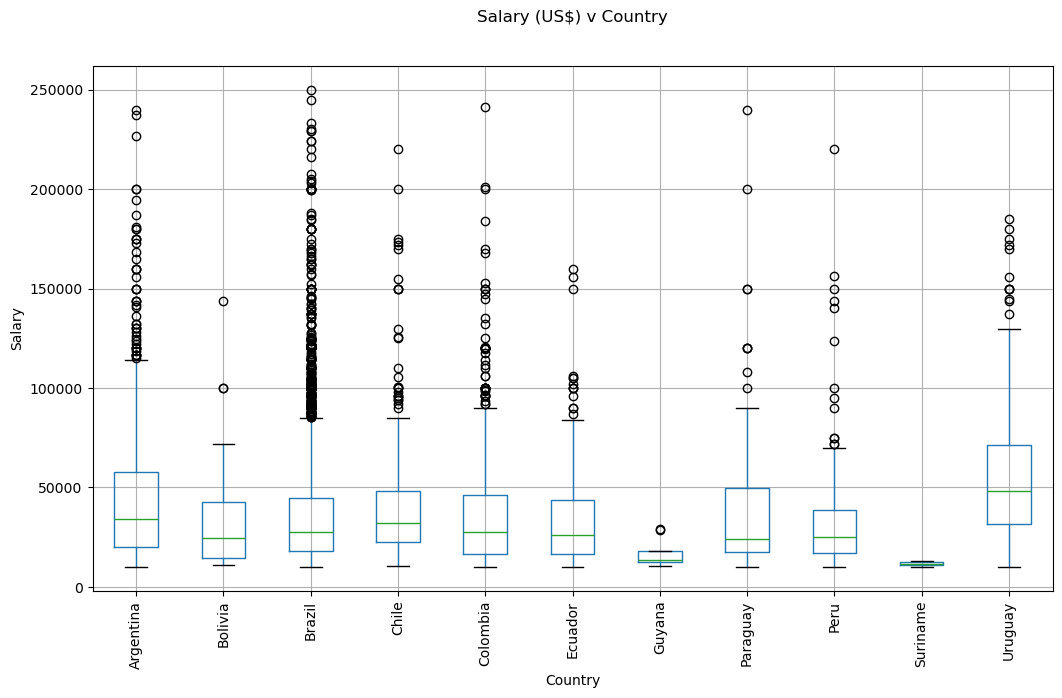

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
south_america_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [39]:
south_america_df.to_csv('south_america.csv', index=False)

In [40]:
# Define the list of countries to keep
countries_to_keep = ['United States of America', 'Canada', 'Mexico']

# Filter the DataFrame
north_america_df = north_america_df[north_america_df['Country'].isin(countries_to_keep)]

In [41]:
north_america_df.head()

,Country,Education Level,Years of Experience,Employment,Salary,Continent
0,Canada,Bachelor’s degree,10.0,Full-time Employment,71093.0,North America
1,Canada,Bachelor’s degree,10.0,Full-time Employment,31764.0,North America
2,Canada,Less than a Bachelors,7.0,Full-time Employment,103615.0,North America
3,Canada,Less than a Bachelors,2.0,Full-time Employment,37816.0,North America
4,Canada,Less than a Bachelors,25.0,Full-time Employment,71850.0,North America


In [42]:
north_america_df.shape

(38343, 6)

In [43]:
north_america_df.describe()

,Years of Experience,Salary
count,38343.000000,3.834300e+04
mean,11.513614,2.352944e+05
std,9.477784,8.748568e+05
min,0.500000,0.000000e+00
25%,4.000000,8.500000e+04
50%,9.000000,1.250000e+05
75%,16.000000,1.800000e+05
max,50.000000,7.435143e+07


In [44]:
north_america_df['Country'].value_counts()

Country
United States of America    30330
Canada                       6587
Mexico                       1426
Name: count, dtype: int64

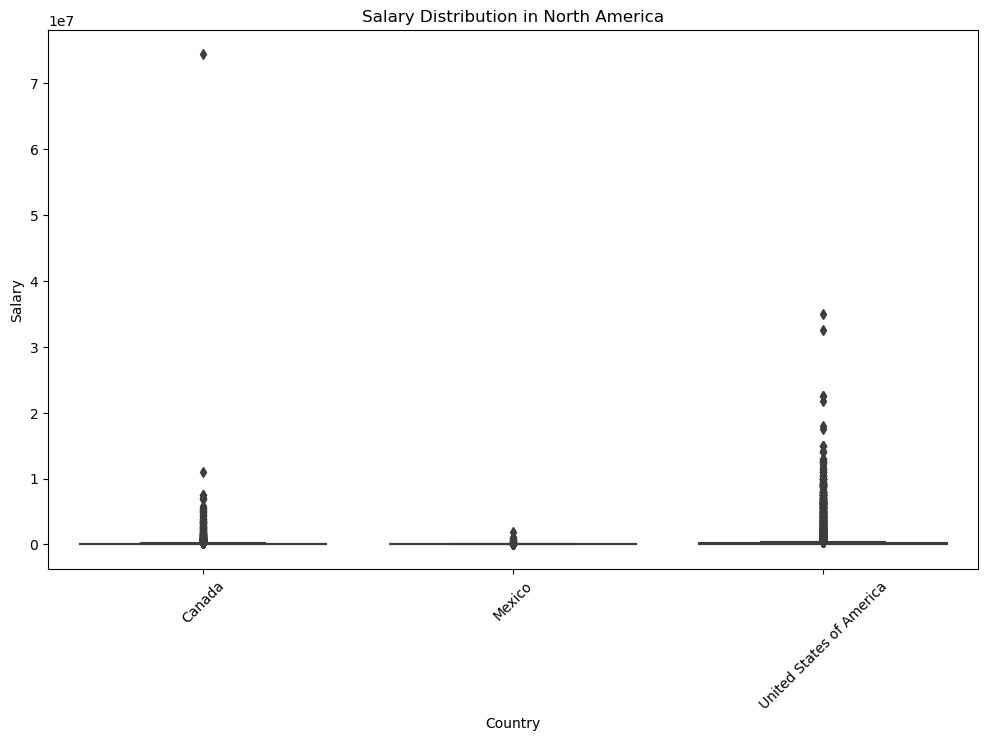

In [45]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='Salary', data=north_america_df)
plt.title('Salary Distribution in North America')
plt.xticks(rotation=45)
plt.show()

In [46]:
north_america_df = north_america_df[north_america_df["Salary"] <= 250000]
north_america_df = north_america_df[north_america_df["Salary"] >= 10000]
north_america_df = north_america_df[north_america_df['Country'] != 'Other']

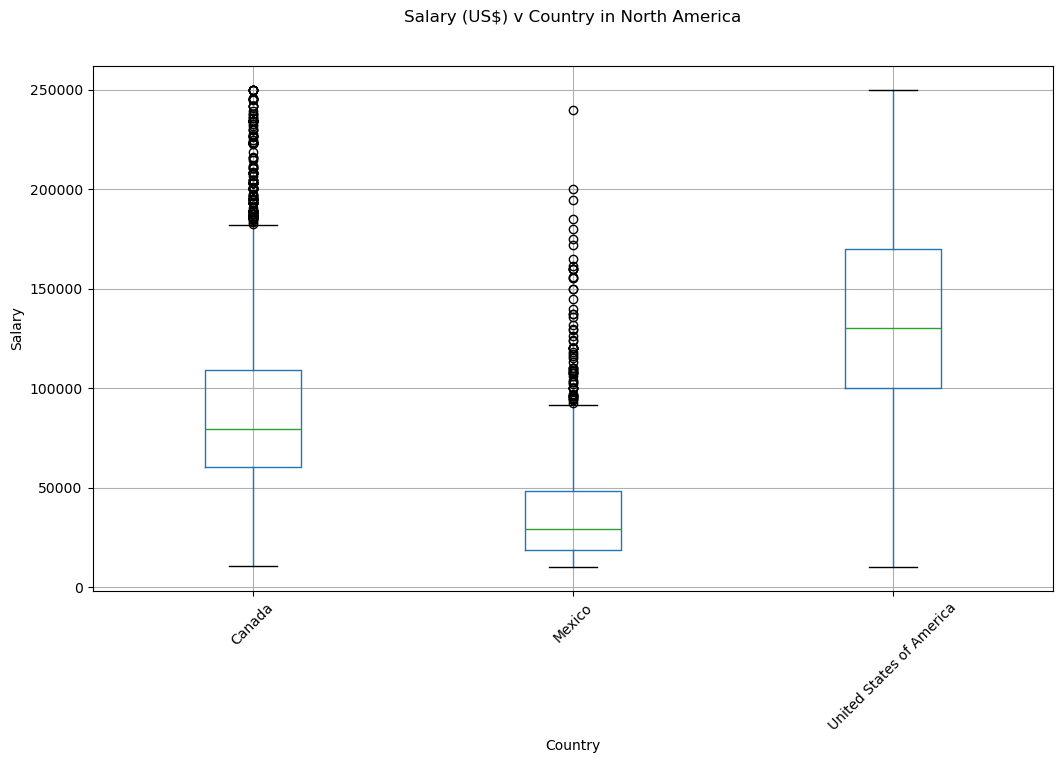

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
north_america_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country in North America')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [48]:
north_america_df.to_csv('north_america.csv', index=False)

To refine our data processing strategy, we segmented the dataset into two distinct geographical areas, aiming to tailor our model training to the unique characteristics of each region. This decision was further informed by our choice to employ one-hot encoding, a technique necessitated by the presence of categorical features within our dataset that are not numeric in nature. By adopting one-hot encoding, we convert these categorical attributes into a binary matrix, enabling us to construct separate, region-specific models. This approach not only facilitates the effective incorporation of non-numeric data but also helps us avoid the complexities associated with handling overly large matrices, streamlining the analysis process.

### Salary Distribution by Continent (Europe, South America and North America)

**Question:** How does the salary distribution compare across continents?

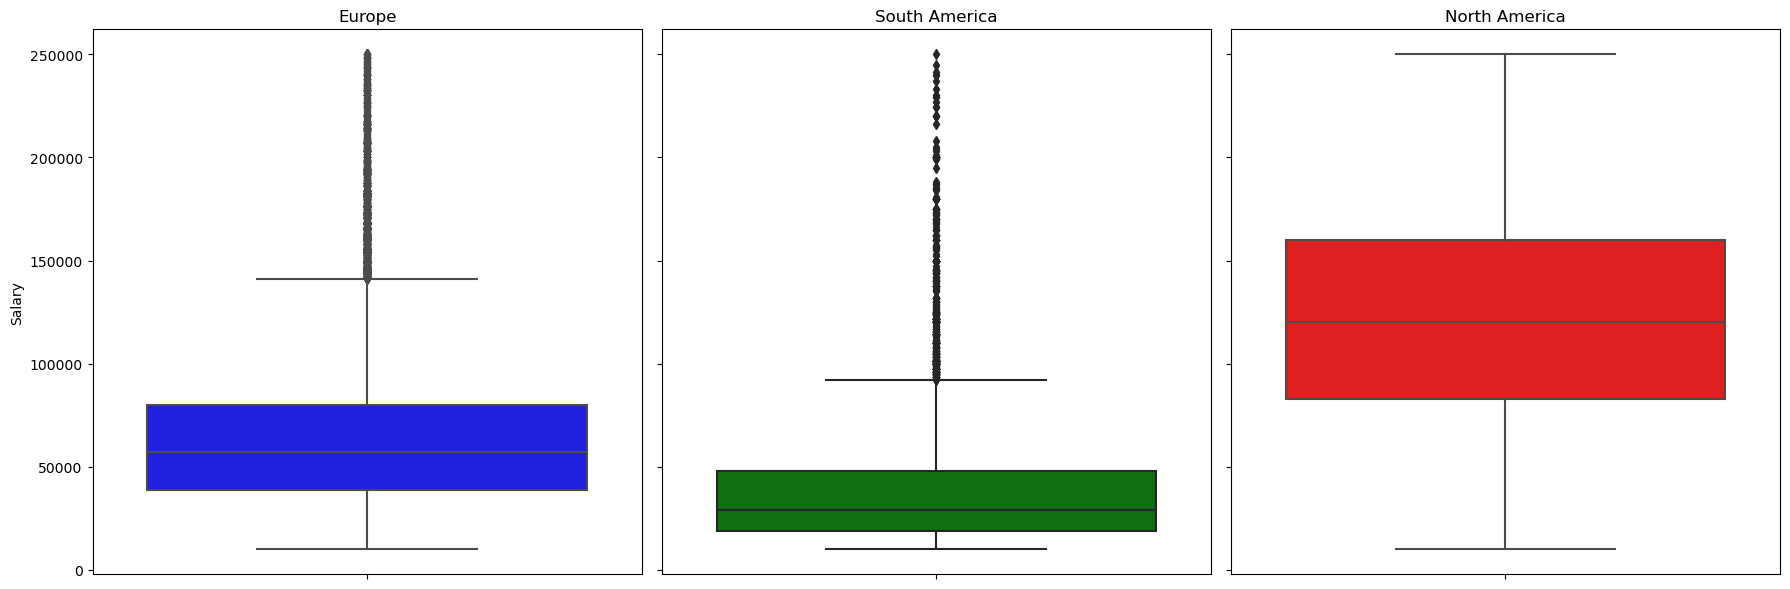

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(y=europe_df['Salary'], ax=ax[0], color='blue')
ax[0].set_title('Europe')
ax[0].set_ylabel('Salary')

sns.boxplot(y=south_america_df['Salary'], ax=ax[1], color='green')
ax[1].set_title('South America')
ax[1].set_ylabel('')

sns.boxplot(y=north_america_df['Salary'], ax=ax[2], color='red')
ax[2].set_title('North America')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

The box plotsot illustrates the distribution of salaries for developers across three continents: Europe, South America, and North America:

- **Europe** shows a wide range of salaries with a compact IQR, suggesting that while there is a broad spread of salaries most of developers earn within a narrower band. The median salary is lower than in North America, and there are many outliers indicating a large number of developers well above the upper quartile.
- **South America** has the lowest salary values among the three, with a very tight IQR, suggesting less variability in salaries, but also a lower overall salary scale. Similar to Europe, there are outliers reflecting that a good amount of developers achieve higher salaries.
- **North America** has the highest median salary and IQR range, reflecting a higher overall salary level and greater variability in what developers can earn.

This analysis highlights the stark contrast in salaries for developers, which can be be influenced by many factors such as cost of living, market demand for technology skills or economic development.

### Salary Distribution by Country within each Continent

**Question:** How does the salary distribution vary by country within each continent?

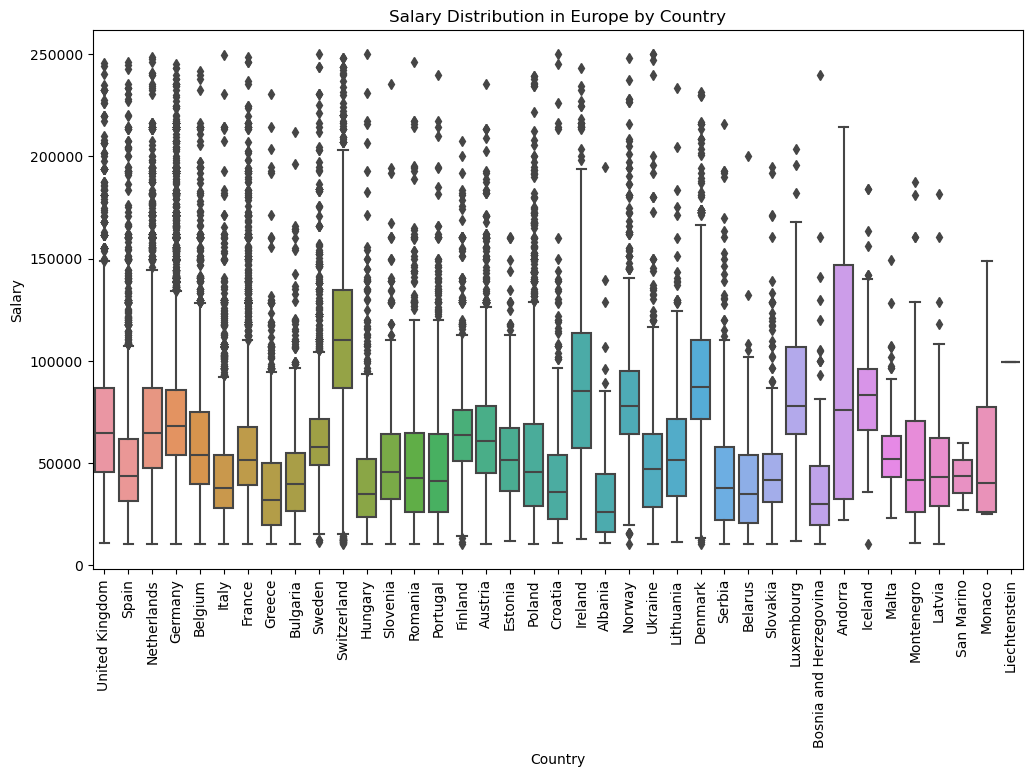

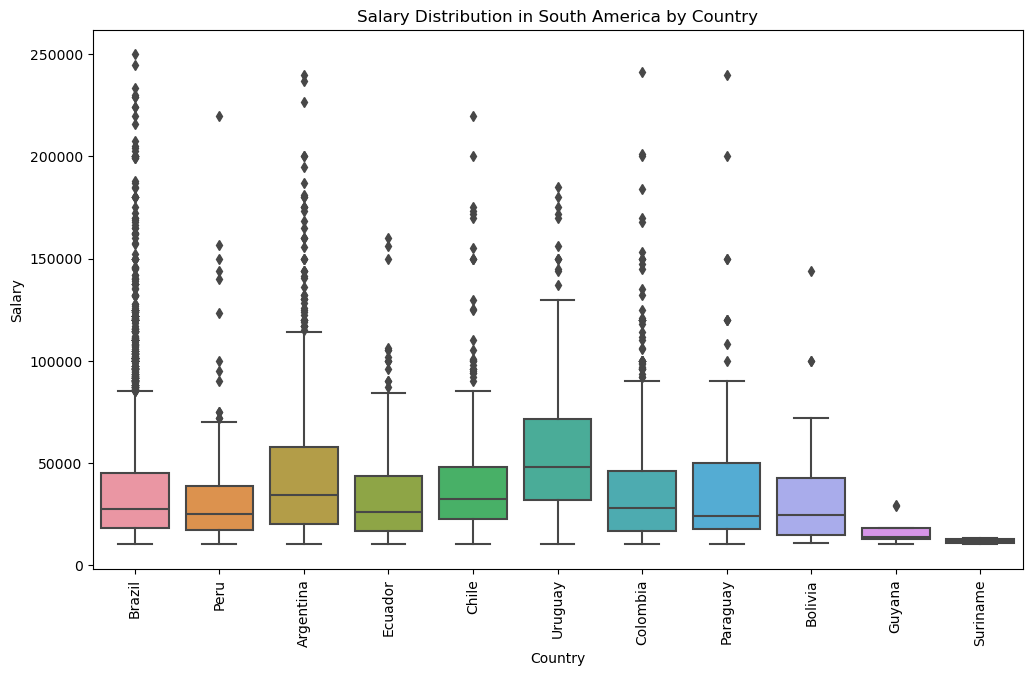

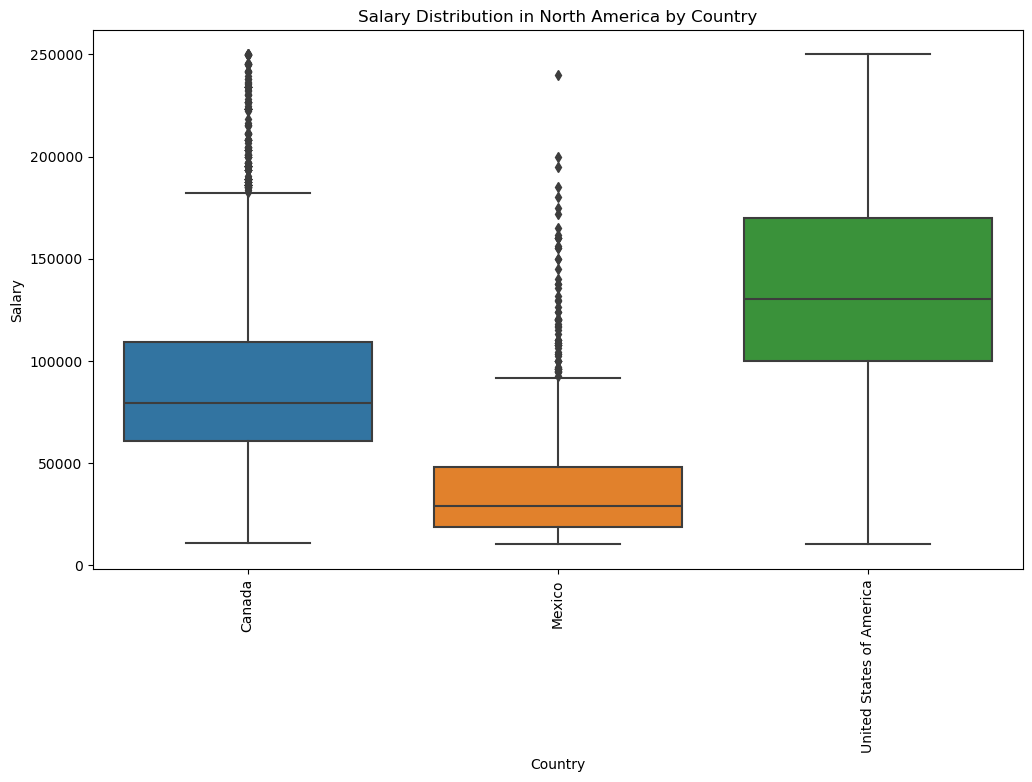

In [50]:
# Europe
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='Salary', data=europe_df)
plt.title('Salary Distribution in Europe by Country')
plt.xticks(rotation=90)
plt.show()

# South America
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='Salary', data=south_america_df)
plt.title('Salary Distribution in South America by Country')
plt.xticks(rotation=90)
plt.show()

# North America
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='Salary', data=north_america_df)
plt.title('Salary Distribution in North America by Country')
plt.xticks(rotation=90)
plt.show()

The boxplots above visualise the salary distribution across Europe, South America, and North America. Each boxplot illustrates the median, quartiles, and range of salaries within each continent.

- **Europe** shows a narrow interquartile range but with many outliers, which suggests a large variation in salaries that exceed the upper quartile. countries like Switzerland and Norway tend to have higher median salaries, which may suggest strong economies and high cost of living. In contrast, Eastern European countries like Bulgaria and Romania exhibit lower median salaries, which may reflect economic disparities within Europe.
- **South America** has a lower median salary and fewer high-earning outliers compared to Europe Brazil has a wide range of salaries with a relatively higher median, which could be due to its larger economy and more diverse job market. Smaller economies, like those of Bolivia and Suriname, show a much smaller salary range and fewer outliers.
- **North America** presents the highest median salary, along with a broad iQR. The USA shows a high median salary with a wide spread, indicating both entry-level positions and high-paying roles. Canada's median salary is lower than the USAs but still shows a wide spread, highlighting the diverse opportunities within its tech sector. Mexico, has the lowest median salary but still shows a significant range, which could be reflective of a growing tech industry.

### Distribution of Years of Experience

**Question:** What is the distribution of years of experience for developers in each continent?

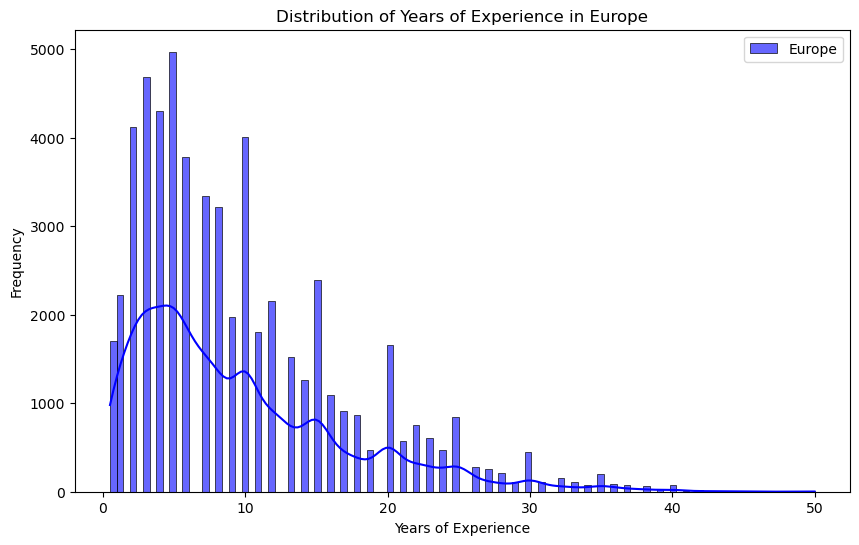

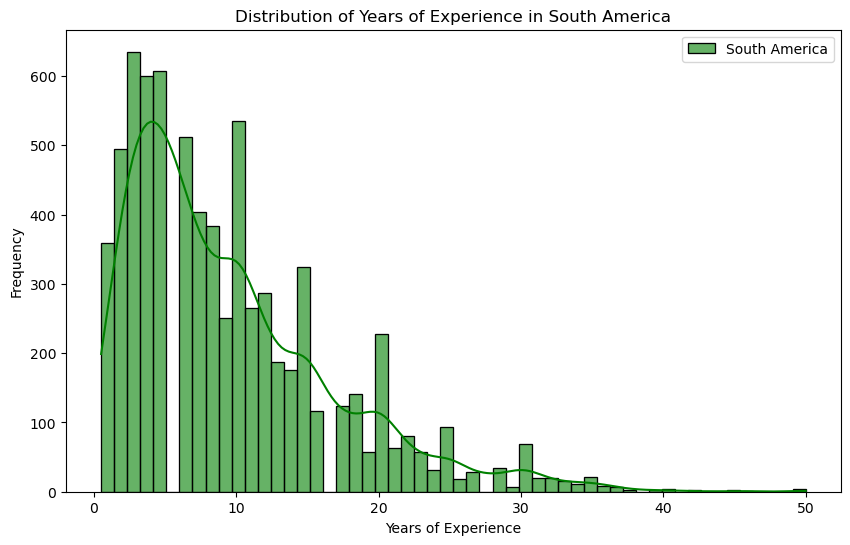

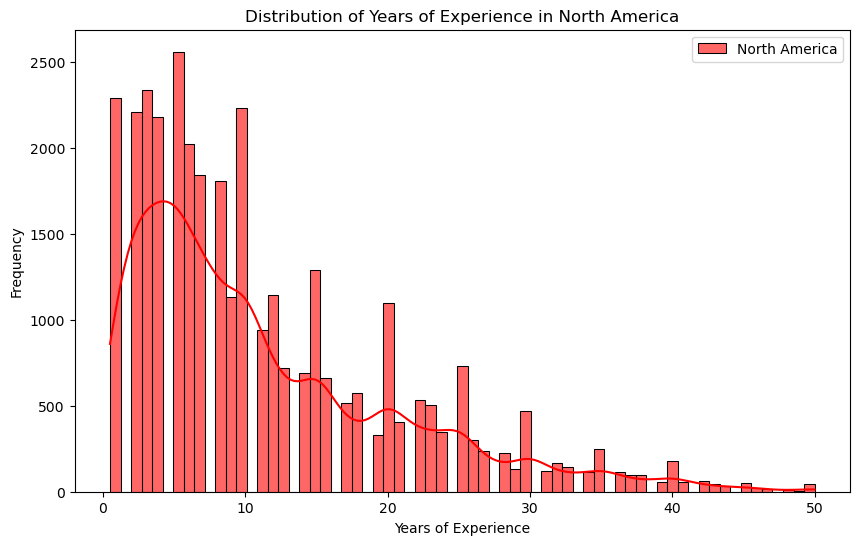

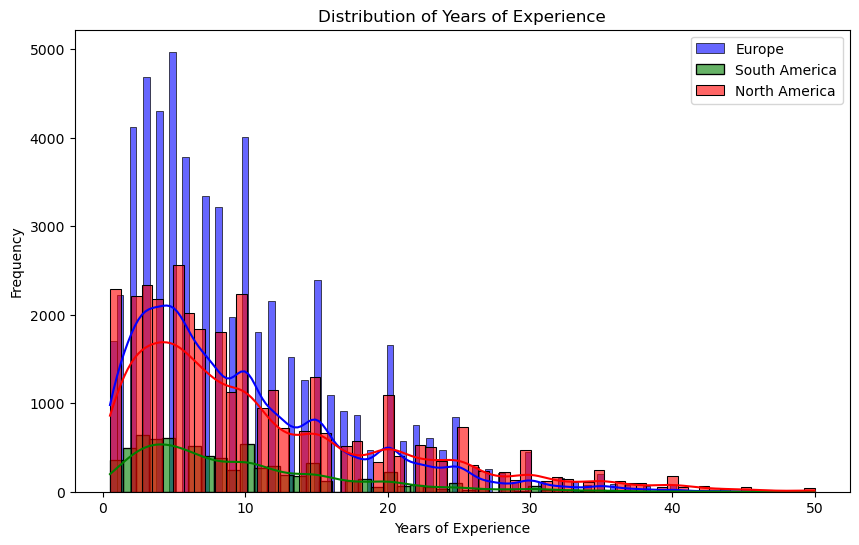

In [51]:
# Distribution of Years of Experience for Europe
plt.figure(figsize=(10, 6))
sns.histplot(europe_df['Years of Experience'], color='blue', kde=True, label='Europe', alpha=0.6)
plt.title('Distribution of Years of Experience in Europe')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Distribution of Years of Experience for South America
plt.figure(figsize=(10, 6))
sns.histplot(south_america_df['Years of Experience'], color='green', kde=True, label='South America', alpha=0.6)
plt.title('Distribution of Years of Experience in South America')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Distribution of Years of Experience for North America
plt.figure(figsize=(10, 6))
sns.histplot(north_america_df['Years of Experience'], color='red', kde=True, label='North America', alpha=0.6)
plt.title('Distribution of Years of Experience in North America')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Distribution of Years of Experience for North America, South America and Europe
plt.figure(figsize=(10, 6))
sns.histplot(europe_df['Years of Experience'], color='blue', kde=True, label='Europe', alpha=0.6)
sns.histplot(south_america_df['Years of Experience'], color='green', kde=True, label='South America', alpha=0.6)
sns.histplot(north_america_df['Years of Experience'], color='red', kde=True, label='North America', alpha=0.6)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- **Europe:** The histogram shows a common trend in the tech industry, with most developers having 0-10 years experience. This might suggest a younger workforce or in tech-related employment opportunities that have attracted newcomers. The distribution has a long tail, reflecting that there are developers with over 30 years of experience, though smaller in number
- **South America:** The histogram shows a similar trend to Europe with a peak at the lower end, indicating larger number of early-careedevelopers. The decrease in frequency as years of experience increase is steady, suggesting fewer opportunities or less retention for veteran professionals within the tech industry in this region.

- **North America:** The distribution of years of experience in North America is quite large in the first 10 years like Europe and South America, illustrating big entry and mid-level professional environment. However, compared to the other two regions, there's more of a presence of developers with over 10 years of experience, which could be indicative of a more mature market with long-term career sustainability

When comparing the distribution of years of experience across the three continents, all regions share a a concentration of developers in the lower experience brackets, likely reflective of new entrants into the tech industry and the rapid technological advancements that require continuous learning and adaptation. The differences in the tails of these distributions could be reflective of each continent's economic development stage and the opportunities available for career advancement in the tech sector.

### Average Salary by Education Level 

**Question:** How does average salary vary by education level across continents?

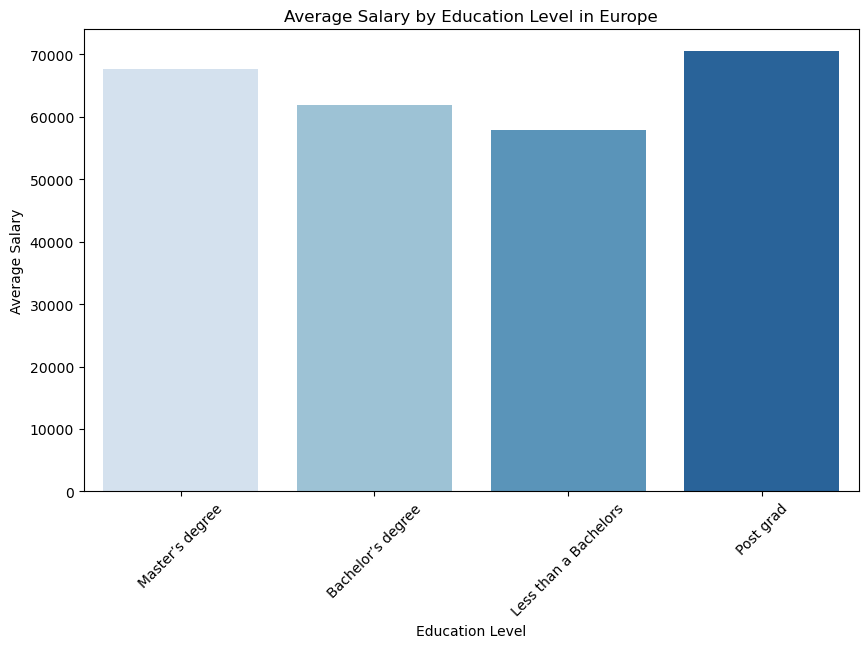

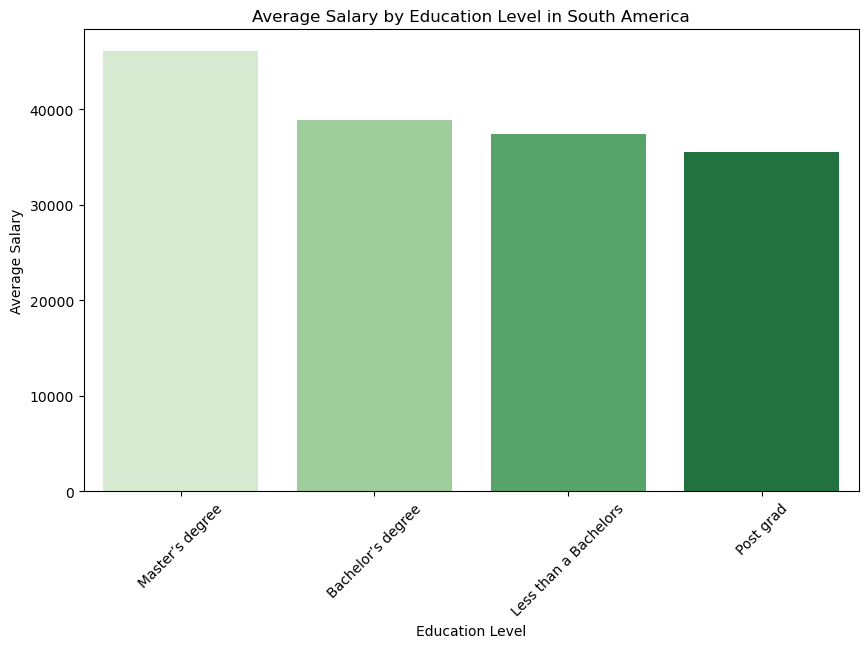

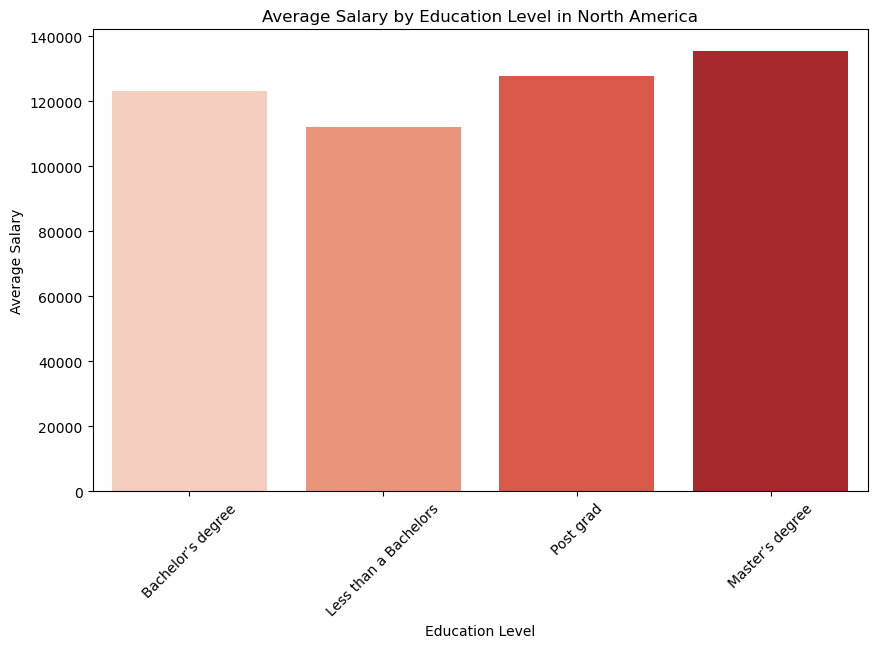

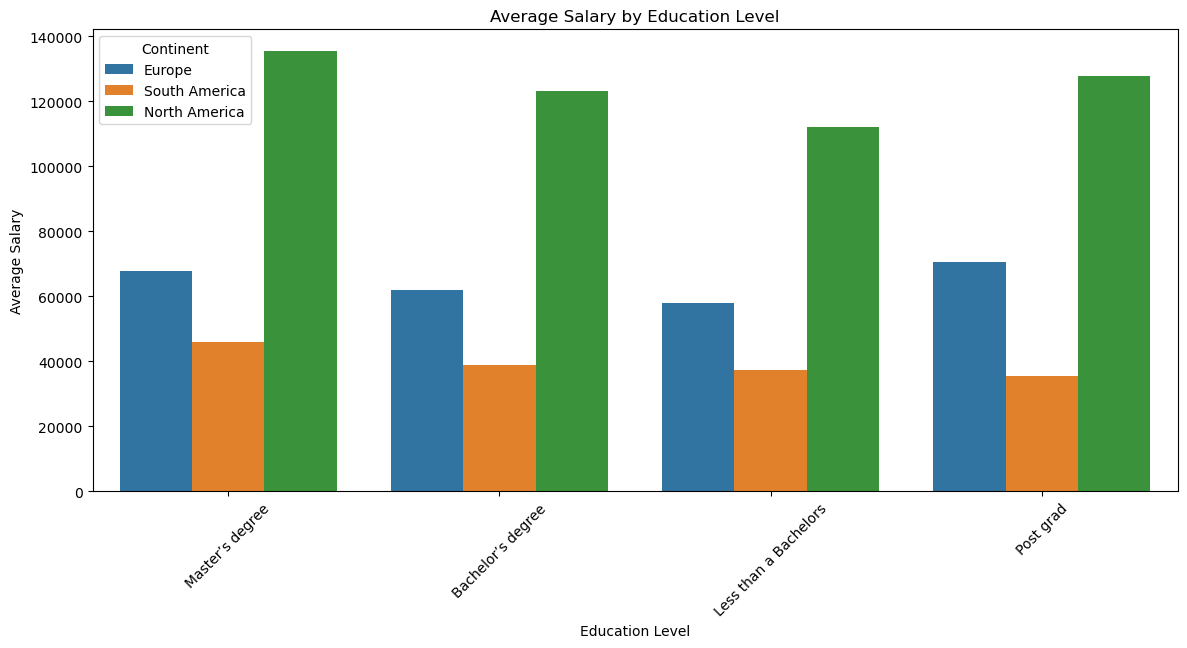

In [52]:
# Histogram for Average Salary by Education Level in Europe
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=europe_df, ci=None, palette='Blues')
plt.title('Average Salary by Education Level in Europe')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Histogram for Average Salary by Education Level in South America
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=south_america_df, ci=None, palette='Greens')
plt.title('Average Salary by Education Level in South America')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


# Histogram for Average Salary by Education Level in North America
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=north_america_df, ci=None, palette='Reds')
plt.title('Average Salary by Education Level in North America')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Histogram for Average Salary by Education Level in NA/EU/SA
plt.figure(figsize=(14, 6))
sns.barplot(x='Education Level', y='Salary', hue='Continent', data=pd.concat([europe_df, south_america_df, north_america_df]), ci=None)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

- **Europe:** The bar chart shows the average salary by education level among developers in Europe. It's clear that higher education generally correlates with higher average salaries. Postgrad degrees have the highest salaries, followed closely by master's degrees. Bachelor's degrees are also quite high, while those with less than a bachelor's degree earn notably less. This trend suggests that investing in higher education may lead to better earnings in the European tech industry.
- **South America:** The average salaries by education level are less differentiated than in Europe. Postgrad and master's degrees still tend to earn more but less than a bachelor's degree earns similar to those with a bachelor's degree and more than a post grad. This could indicate a market where experience and skills might be as significant as formal education or that the tech industry in South America values different criteria for salary determination compared to Europe.
- **North America:** Similar to Europe, Postgrad degrees have the highest salaries, followed closely by master's degrees. Again followed closely by Bachelors Degrees with developers cotaining less than a bachelor's degree earning slghtly less.

The combined bar chart provides a comparative look at how average salary varies by education level across Europe, South America, and North America. While postgrad education tend to hold higher salaries, the disparities between different education levels vary by continent. North America stands out with a higher average salary for those with less than a bachelor's degree compared to other education levels, which diverges from the trends seen in Europe and South America. This comparison highlights how geographical and cultural differences can influence the value placed on educational chievementnt within the tech sector.

### Salary vs. Years of Experience

**Question:** How does salary relate to years of experience in each continent?

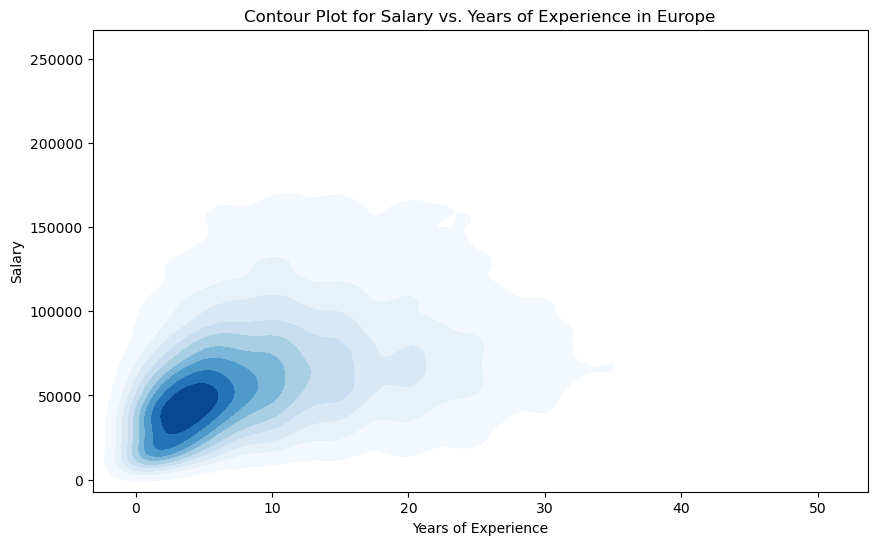

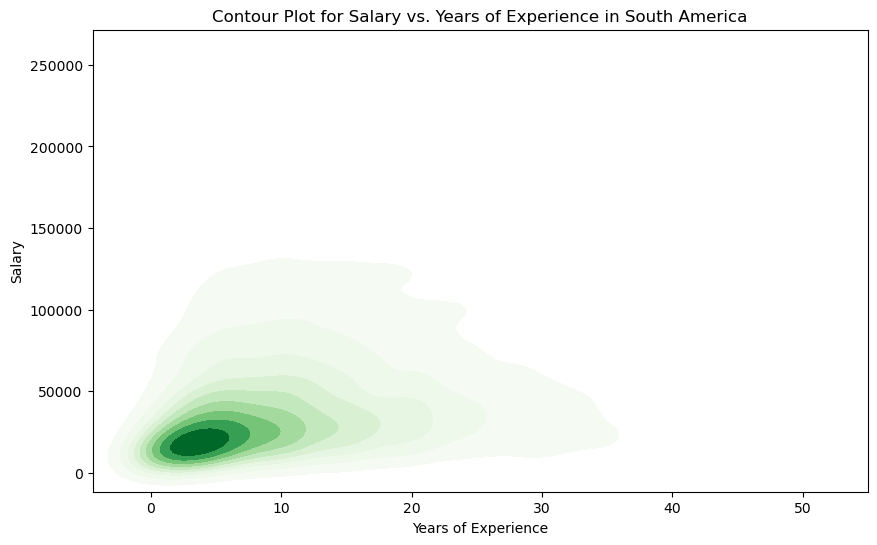

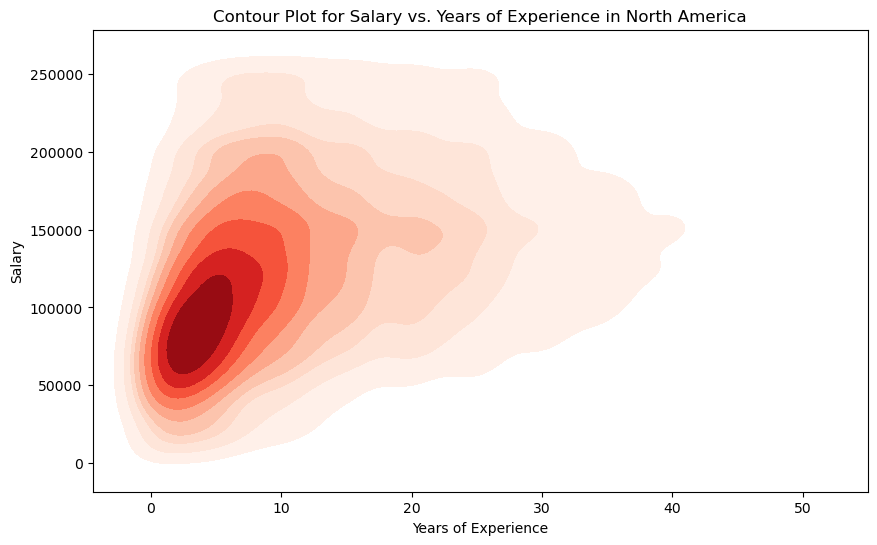

In [53]:
# Europe

# Contour Plot Code
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Years of Experience', y='Salary', data=europe_df, cmap='Blues', fill=True)
plt.title('Contour Plot for Salary vs. Years of Experience in Europe')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# South America
# Contour Plot Code
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Years of Experience', y='Salary', data=south_america_df, cmap='Greens', fill=True)
plt.title('Contour Plot for Salary vs. Years of Experience in South America')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# North America
# Contour Plot Code
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Years of Experience', y='Salary', data=north_america_df, cmap='Reds', fill=True)
plt.title('Contour Plot for Salary vs. Years of Experience in North America')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


Both **European** and **South American** data show the highest density of salaries in the lower experience range.
In both regions, there is a lack of a strong, consistent upward trend correlating salary with years of experience, suggesting that higher experience does not uniformly mean higher pay.

The common salary ranges for lower years of experience appear to be similar, concentrated on the lower end of the salary spectrum.
For both, as experience increases, the distribution of salaries becomes more spread out, indicating greater variability in pay as people progress in their careers.

Overall, the plots suggest that within both markets, there's a wide variance in how much experience translates to salary, with many other factors likely influencing salary beyond just years of experience.

### Salary Distribution by Employment Type

**Question:** What is the salary distribution by employment type within each continent?

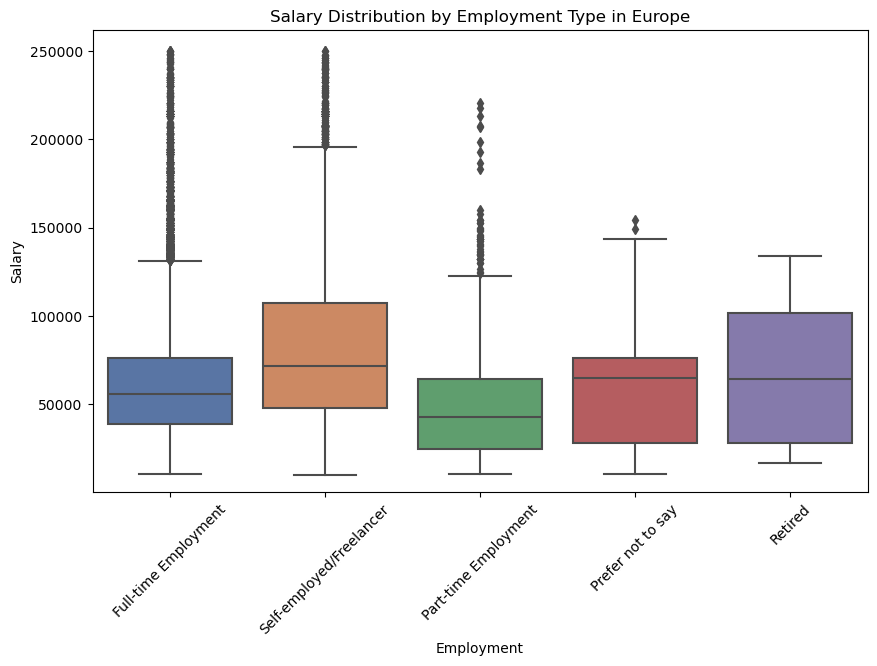

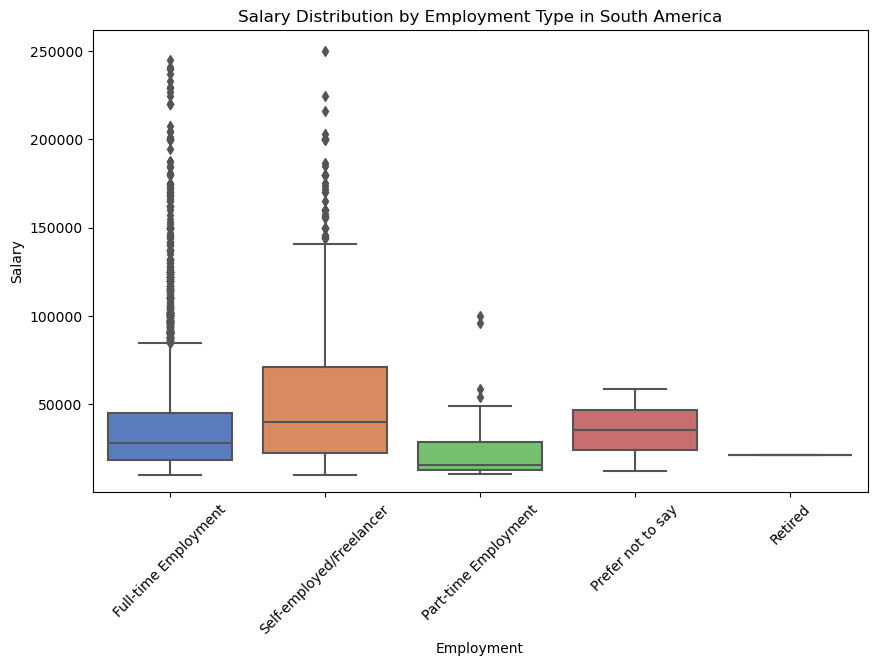

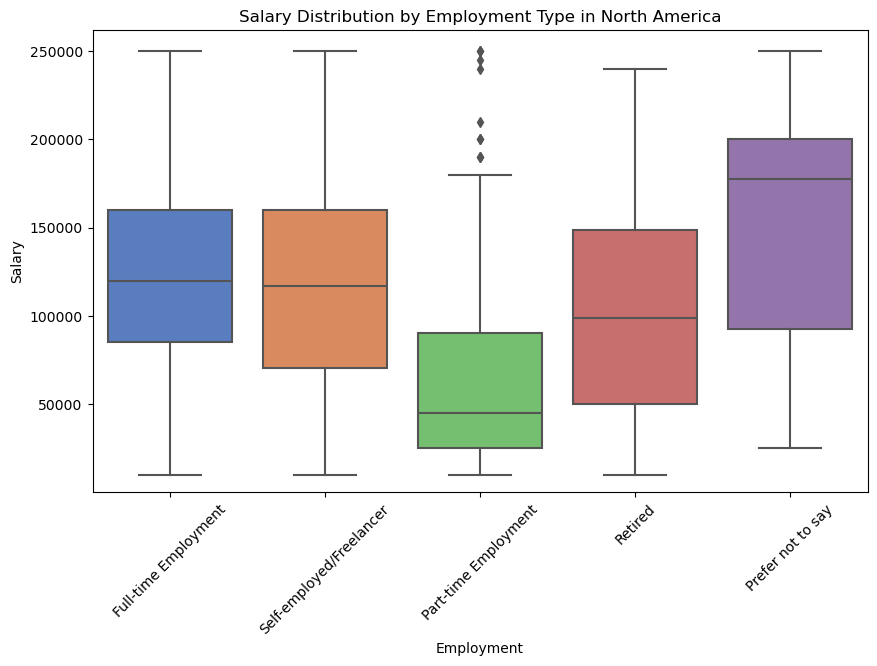

In [54]:
# Europe
plt.figure(figsize=(10, 6))
# Use a seaborn color palette like 'deep', 'muted', or a custom one
sns.boxplot(x='Employment', y='Salary', data=europe_df, palette='deep')
plt.title('Salary Distribution by Employment Type in Europe')
plt.xticks(rotation=45)
plt.ylim(bottom=20) 
plt.show()

# For South America
plt.figure(figsize=(10, 6))
# Use a seaborn color palette or specify the color parameter
sns.boxplot(x='Employment', y='Salary', data=south_america_df, palette='muted')
plt.title('Salary Distribution by Employment Type in South America')
plt.xticks(rotation=45)
plt.ylim(bottom=20) 
plt.show()


# For North America
plt.figure(figsize=(10, 6))
# Use a seaborn color palette or specify the color parameter
sns.boxplot(x='Employment', y='Salary', data=north_america_df, palette='muted')
plt.title('Salary Distribution by Employment Type in North America')
plt.xticks(rotation=45)
plt.ylim(bottom=20) 
plt.show()



- **Europe:** The boxplot shows that full-time employees have a wide salary range, suggesting diverse job roles and industries in Europe. Self-employed/freelancers have a higher median salary, which could be due to the nature of their work or the ability to charge high rates for specialized services. Part-time employees and retirees show a lower median salary, as expected due to fewer working hours or retirement. Interestingly, individuals who prefer not to disclose their employment status have a wide salary range, suggesting a variety of circumstances behind this choice.
- **South America:** The salary distribution reveals that full-time employees have a relatively consistent salary range but with high outliers like Europe. Self-employed/freelancers have a slightly smaller median and a smaller interquartile range than Europe, which may reflect less variability in freelance or contract work within this region. Part-time workers have the lowest median salary, aligning with the expected trend for reduced hours. Retirees and those who prefer not to say have very limited data.
- **North America:** The's boxplot shows a high median salary for full-time employees, with a significant spread, reflecting the robust job market and high demand for tech skills. Self-employed/freelancers also enjoy high median salaries, possibly benefiting from a stroig economy and the need for specialized expertise. Part-time workerh have a noticeably lower salary range, which is expected given their work status. The category of those who prefer not to say shows a wide range of salaries, hinting at a mixed group with various employment scenario.

### Checking for correlation between the possible features to be used in the Salary Prediction Model for South America 

In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the features
features = ['Country', 'Education Level', 'Years of Experience', 'Salary']

# Create a subset of the DataFrame with the features of interest
df_features = south_america_df[features]

# Apply OneHotEncoder to the categorical features
ohe = OneHotEncoder(sparse=False)
encoded_categorical = ohe.fit_transform(df_features[['Country', 'Education Level']])

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_categorical, columns=ohe.get_feature_names_out(['Country', 'Education Level']))

# Add the numerical feature(s) and target variable to the encoded DataFrame
encoded_df['Years of Experience'] = df_features['Years of Experience']
encoded_df['Salary'] = df_features['Salary']

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

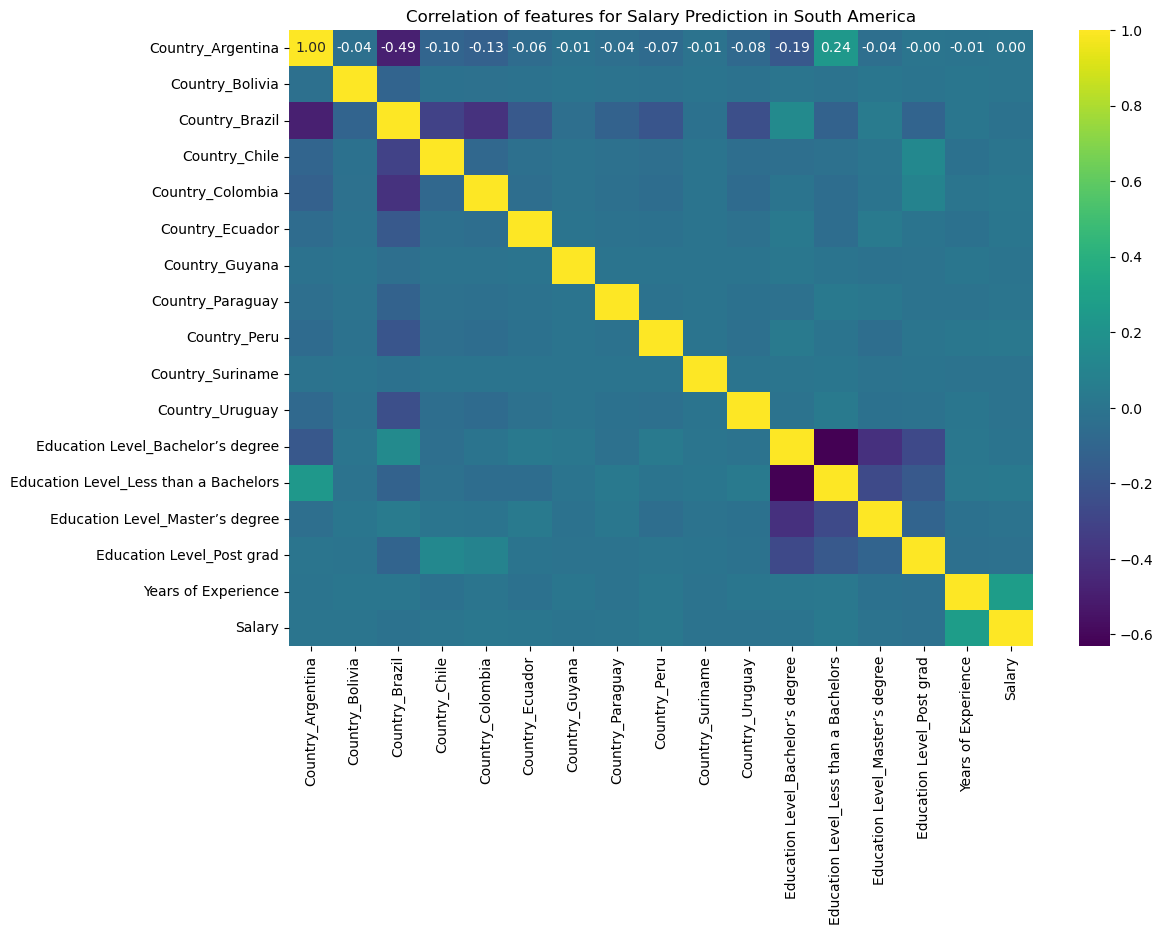

In [65]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation of features for Salary Prediction in South America')
plt.show()

In [45]:
europe_df.drop('Employment', axis=1, inplace=True)
south_america_df.drop('Employment', axis=1, inplace=True)
north_america_df.drop('Employment', axis=1, inplace=True)

In [46]:
europe_df.drop('Continent', axis=1, inplace=True)
south_america_df.drop('Continent', axis=1, inplace=True)
north_america_df.drop('Continent', axis=1, inplace=True)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump, load

### Model Training to Predict Salary according to the European, South American and North American Job Landscape

We will use the MSE to measure the different errors achieved by different regressions tested in this exercise. The MSE is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model. 

In [ ]:
#####################################

For South America

In [49]:
# Define the features and the target variable
X = south_america_df.drop('Salary', axis=1)
y = south_america_df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns and numerical columns
categorical_cols = ['Country', 'Education Level'] 
numerical_cols = ['Years of Experience']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define a pipeline for each model with preprocessing and the estimator
pipelines = {
    'lr': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'rf': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'dt': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ])
}

# Parameters for GridSearchCV
param_grid = {
    'lr': {},
    'rf': {'regressor__n_estimators': [10, 50, 100], 'regressor__max_depth': [None, 10, 20, 30]},
    'dt': {'regressor__max_depth': [None, 10, 20, 30]}
}


# Train each model and perform grid search, and print the errors
best_models = {}
for model_name, pipeline in pipelines.items():
    print(f"Training and performing grid search for {model_name}...")
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    # Calculation of MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)  
    
    print(f"{model_name} RMSE on test set: {rmse}")
    print(f"Best RMSE for {model_name} from GridSearchCV: {sqrt(-grid_search.best_score_)}")  # Convert neg_mean_squared_error to positive and take the square root
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    best_models[model_name] = grid_search.best_estimator_

# Assuming you want to save the best model from all
best_model_name = min(best_models, key=lambda name: mean_squared_error(y_test, best_models[name].predict(X_test)))
best_model = best_models[best_model_name]

# Save the best model
dump(best_model, 'best_model_SA.joblib')


Training and performing grid search for lr...
lr RMSE on test set: 29749.66529175701
Best RMSE for lr from GridSearchCV: 30081.50243828355
Best parameters for lr: {}
Training and performing grid search for rf...
rf RMSE on test set: 29235.479540442386
Best RMSE for rf from GridSearchCV: 30335.95629888988
Best parameters for rf: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
Training and performing grid search for dt...
dt RMSE on test set: 29944.996078499225
Best RMSE for dt from GridSearchCV: 31351.00220293707
Best parameters for dt: {'regressor__max_depth': 10}


['best_model_SA.joblib']

In [51]:
# Later, to load and use the best model
loaded_model = load('best_model_SA.joblib')
y_pred = loaded_model.predict(X_test)
print(f"Salary Predictions for South American market: {y_pred}")

Salary Predictions for South American market: [46235.402974   36346.99790532 38433.04848325 ... 49327.0107126
 25075.65726824 48039.51857546]


In [52]:
print(f"Predictions: {y_pred}")

Predictions: [46235.402974   36346.99790532 38433.04848325 ... 49327.0107126
 25075.65726824 48039.51857546]


In [ ]:
#####################################

For Europe:

In [53]:
# Define the features and the target variable
X_EU = europe_df.drop('Salary', axis=1)
y_EU = europe_df['Salary']

# Split the data into training and testing sets
X_train_EU, X_test_EU, y_train_EU, y_test_EU = train_test_split(X_EU, y_EU, test_size=0.2, random_state=42)

# Train each model and perform grid search, and print the RMSE for Europe
best_models_EU = {}
for model_name, pipeline in pipelines.items():
    print(f"Training and performing grid search for {model_name} in Europe...")
    grid_search_EU = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search_EU.fit(X_train_EU, y_train_EU)
    y_pred_EU = grid_search_EU.predict(X_test_EU)
    
    rmse_EU = sqrt(mean_squared_error(y_test_EU, y_pred_EU))
    
    print(f"{model_name} RMSE on test set: {rmse_EU}")
    print(f"Best RMSE for {model_name} from GridSearchCV: {sqrt(-grid_search_EU.best_score_)}")
    print(f"Best parameters for {model_name}: {grid_search_EU.best_params_}")
    
    best_models_EU[model_name] = grid_search_EU.best_estimator_

# After training and finding the best model pipeline for Europe
best_model_name_EU = min(best_models_EU, key=lambda name: mean_squared_error(y_test_EU, best_models_EU[name].predict(X_test_EU)))
best_pipeline_EU = best_models_EU[best_model_name_EU]

# Save the best pipeline, which includes preprocessing and model
dump(best_pipeline_EU, 'best_model_EU.joblib')

Training and performing grid search for lr in Europe...
lr RMSE on test set: 29529.92734432837
Best RMSE for lr from GridSearchCV: 29044.720393336047
Best parameters for lr: {}
Training and performing grid search for rf in Europe...
rf RMSE on test set: 29064.366108566406
Best RMSE for rf from GridSearchCV: 28634.49189152652
Best parameters for rf: {'regressor__max_depth': 20, 'regressor__n_estimators': 100}
Training and performing grid search for dt in Europe...
dt RMSE on test set: 29340.83199199292
Best RMSE for dt from GridSearchCV: 28915.75374457043
Best parameters for dt: {'regressor__max_depth': 10}


['best_model_EU.joblib']

In [54]:
# Later, to load and use the best model
# Loading the best pipeline for Europe
best_pipeline_EU = load('best_model_EU.joblib')

# Make predictions with the loaded pipeline
y_pred_EU = best_pipeline_EU.predict(X_test_EU)

y_pred_EU

array([75179.53765943, 49723.54232796, 62538.09700345, ...,
       48061.13064481, 66635.54335928, 75853.97776358])

In [ ]:
#####################################

For North America:

In [55]:
# Define the features and the target variable
X_NA = north_america_df.drop('Salary', axis=1)
y_NA = north_america_df['Salary']

# Split the data into training and testing sets
X_train_NA, X_test_NA, y_train_NA, y_test_NA = train_test_split(X_NA, y_NA, test_size=0.2, random_state=42)

# Preprocessing, model pipelines, and parameter grid as defined before

# Train each model and perform grid search, and print the RMSE for North America
best_models_NA = {}
for model_name, pipeline in pipelines.items():
    print(f"Training and performing grid search for {model_name} in North America...")
    grid_search_NA = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search_NA.fit(X_train_NA, y_train_NA)
    y_pred_NA = grid_search_NA.predict(X_test_NA)
    
    rmse_NA = sqrt(mean_squared_error(y_test_NA, y_pred_NA))
    
    print(f"{model_name} RMSE on test set: {rmse_NA}")
    print(f"Best RMSE for {model_name} from GridSearchCV: {sqrt(-grid_search_NA.best_score_)}")
    print(f"Best parameters for {model_name}: {grid_search_NA.best_params_}")
    
    best_models_NA[model_name] = grid_search_NA.best_estimator_

# Save the best model from North America
best_model_name_NA = min(best_models_NA, key=lambda name: mean_squared_error(y_test_NA, best_models_NA[name].predict(X_test_NA)))
dump(best_models_NA[best_model_name_NA], 'best_model_NA.joblib')

Training and performing grid search for lr in North America...
lr RMSE on test set: 45611.49087267879
Best RMSE for lr from GridSearchCV: 45519.31170567059
Best parameters for lr: {}
Training and performing grid search for rf in North America...
rf RMSE on test set: 43568.28312673334
Best RMSE for rf from GridSearchCV: 43510.3920420537
Best parameters for rf: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
Training and performing grid search for dt in North America...
dt RMSE on test set: 43674.84330998611
Best RMSE for dt from GridSearchCV: 43584.899895694914
Best parameters for dt: {'regressor__max_depth': 10}


['best_model_NA.joblib']

In [56]:
# Later, to load and use the best model
loaded_model = load('best_model_NA.joblib')
y_pred_NA = loaded_model.predict(X_test_NA)
print(f"Salary Predictions for North American market: {y_pred_NA}")

Salary Predictions for North American market: [140703.88025384 140703.88025384 152283.06734686 ... 145903.22861732
 160836.49937266  80252.14269425]
